# Question 3 - Latent Features for Recommendations

Import all the libraries we are using.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Begin by defining the given constants $k$ and $\lambda$ and finding the number of rows and columns in matrix $R$. The number of rows, denoted $m$, is the maximum number among all user indices, and the number of columns $n$ is the maximum number among all movie indices.

In [2]:
# initial constants
k = 20
eta = 8 * 10e-4
lam = 0.1

file_name = "data/ratings.train.txt"

# find number of rows and columns of R
with open(file_name, "r") as f:
    n = max(int(row.split("\t")[0]) for row in f)
    f.seek(0)  
    m = max(int(row.split("\t")[1]) for row in f)

In [3]:
m, n

(1682, 943)

### Main part of the program

We start by initializing matrices $P$ and $Q$  to matrices of random values, such that for all users $u$ and movies $i$, $q_i \cdot p_u^T \in [0, 5]$.
On the created matrices, we do 40 iterations. In each iteration, we first update matrices $P$ and $Q$ and then calculate the error $E$. Updating is done for every non-zero element of $R$ by calculating the derivative of $E$: $\epsilon_{iu} = 2 (r_{iu} - q_i \cdot p_u)$, where $q_i$ is the $i$-th row of matrix $Q$ and $p_u$ is the $u$-th row of matrix $P$. We update $u$-th row of $P$ to $p_u + \eta (\epsilon_{iu} q_i - 2 \lambda p_u)$ and $i$-th row of $Q$ to $q_i + \eta (\epsilon_{iu} p_u - 2 \lambda q_i)$.
Error is calculated using the formula 
$$ E = \left(  \sum_{(i,u) \in ratings} (R_{iu} - q_i \cdot p_u^T)^2 \right) + \lambda \left[ \sum_{u} || p_u ||^2 + \sum_{i} || q_i ||^2 \right] \text{.}$$

After trial and error, we've determined that an optimal estimate for the learning rate $\eta$ is approximately $5 \cdot 10^{-4}$.

In [4]:
E_list = list()

# First initialize the matrices P and Q.
P = np.random.rand(n, k) * np.sqrt(0.25)        # matrix corresponding to users
Q = np.random.rand(m, k) * np.sqrt(0.25)        # matrix corresponding to items

for _ in range(40):

    # Do 40 iterations. In each calculate updated matrices P and Q
    for row in list(open(file_name, "r")):
        row = row.strip().split("\t")
        j, i, el = [int(x) for x in row]
        j, i = j-1, i-1
    
        epsilon = 2 * (el - np.dot(Q[i], P[j]))
        Q[i] =  Q[i] + eta * (epsilon * P[j] - 2 * lam * Q[i])
        P[j] =  P[j] + eta * (epsilon * Q[i] - 2 * lam * P[j])
    
        
    # Calculate error using P and Q
    E = 0
    for row in list(open(file_name, "r")):
        row = row.strip().split("\t")
        j, i, el = [int(x) for x in row]
        j, i = j-1, i-1
    
        E += (el - np.dot(Q[i], P[j]))**2
    
    for j in range(n):
        E += eta * (np.linalg.norm(P[j]))**2
    
    for i in range(m):
        E += eta * (np.linalg.norm(Q[i]))**2
    
    print(E)
    E_list += [E]


83118.97056007809
79602.63505518113
78429.56151529543
77610.70179499457
76751.99007001902
75682.00565754181
74337.9917928482
72788.3673212344
71177.76191588437
69605.8182497988
68095.34296767504
66638.40758550909
65229.926643005885
63873.96082965883
62579.76343227086
61357.13104461157
60213.41702735409
59152.2712855162
58173.67500891256
57274.72098665486
56450.63207907643
55695.67924998022
55003.85546475207
54369.29879069061
53786.52000484824
53250.500501229435
52756.713842720084
52301.107079640315
51880.06364869859
51490.3599321538
51129.121659852775
50793.78303835
50482.04975621485
50191.866148265166
49921.38638995703
49668.94941028177
49433.05714049859
49212.35570033815
49005.6191356143
48811.735348616305


Plot $E$ with respect to number of iterations.

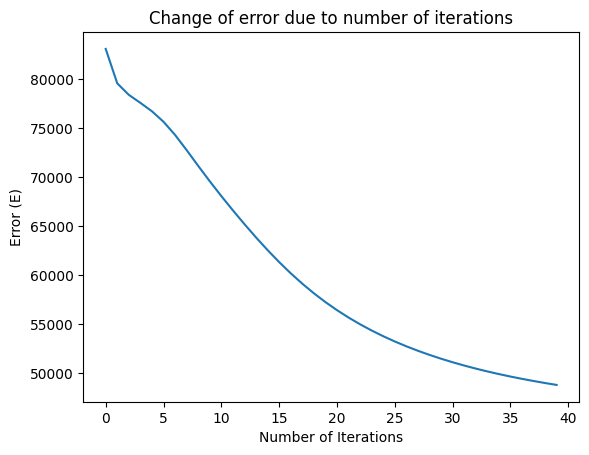

In [5]:
plt.plot(range(40), E_list)
plt.xlabel('Number of Iterations')
plt.ylabel('Error (E)')
plt.title('Change of error due to number of iterations')
plt.savefig("error.png")